In [1]:
import matplotlib.pyplot as plt

from netam import pretrained

# DNSM Model Demo

This notebook demonstrates how to use the DNSM (Deep Network for Selection Models) pretrained models. 

DNSM models predict selection factors for amino acid sequences. Unlike the Thrifty models that work with nucleotide sequences and predict mutation rates, DNSM models:
- Take amino acid sequences as input
- Expect input as tuples of (heavy_chain, light_chain)
- Return selection factors indicating selective pressure at each position

**Important**: The DNSM models in this demo are heavy-chain-only models, so we use an empty string for the light chain.

In [2]:
crepe = pretrained.load("DNSMHumV1.0-1M")

Loading model DNSMHumV1.0-1M
Using cached models: /Users/matsen/re/netam/netam/_pretrained/dnsm-1.0.0.zip


We'll use a heavy chain amino acid sequence from the first entry in the `data/wyatt-10x-1p5m_pcp_2023-11-30_NI.first100.csv.gz` dataset.

In [3]:
heavy_seq = "QVQLVESGGGVVQPGRSLRLSCAASGFTFSSSGMHWVRQAPGKGLEWVAVIWYDGSNKYYADSVKGRFTISRDNSKNTVYLQMNSLRAEDTAVYYCAREGHSNYPYYYYYMDVWGKGTTVTVSS"

print(f"Heavy chain amino acid sequence length: {len(heavy_seq)}")
print(f"AA sequence: {heavy_seq}")

Heavy chain amino acid sequence length: 124
AA sequence: QVQLVESGGGVVQPGRSLRLSCAASGFTFSSSGMHWVRQAPGKGLEWVAVIWYDGSNKYYADSVKGRFTISRDNSKNTVYLQMNSLRAEDTAVYYCAREGHSNYPYYYYYMDVWGKGTTVTVSS


Prepare the input as a tuple (heavy_chain, light_chain). Since these are heavy-chain-only DNSM models, we use an empty string for the light chain. Then get selection factors from the model.

In [4]:
aa_input = (heavy_seq, "")

selection_factors_tuple = crepe.model.selection_factors_of_aa_str(aa_input)
selection_factors = selection_factors_tuple[0]

print(f"Selection factors tensor shape: {selection_factors.shape}")

Selection factors tensor shape: torch.Size([124])


Convert the tensor to a numpy array and create a 1D plot showing selection factors across amino acid positions.

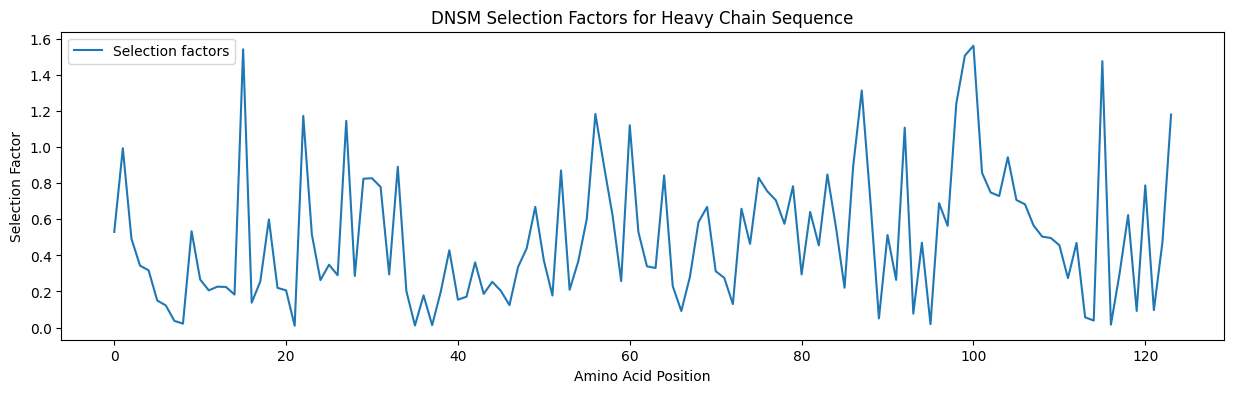

In [5]:
selection_factors_array = selection_factors.detach().numpy()

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(selection_factors_array, label="Selection factors")
ax.set_xlabel("Amino Acid Position")
ax.set_ylabel("Selection Factor")
ax.set_title("DNSM Selection Factors for Heavy Chain Sequence")
ax.legend()
plt.show()

## Selection Factors Interpretation

The selection factors represent the relative selective pressure at each amino acid position:
- Higher values indicate stronger positive selection (mutations more likely to be beneficial)
- Lower values indicate stronger negative selection (mutations more likely to be deleterious)
- Values around 1 indicate neutral selection